TEXT

In [2]:
# IMPORTS
import random
import numpy as np
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# from EDAspy.optimization import UMDAb

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

In [3]:
# Set random seed to ensure reproducibility
random.seed(37)

In [4]:
# file_path = 'instances_01_KP/low-dimensional/f1_l-d_kp_10_269'
file_path = 'instances_01_KP/low-dimensional/f2_l-d_kp_20_878'
# file_path = 'instances_01_KP/low-dimensional/f8_l-d_kp_23_10000'
# file_path = 'instances_01_KP/large_scale/knapPI_1_100_1000_1'

data = np.loadtxt(file_path, dtype=int, usecols=(0, 1))
col_1 = data[:, 0]
col_2 = data[:, 1]

n_items = col_1[0]
capacity = col_2[0]

values = data[1:, 0]
weights = data[1:, 1]

# print("First Column:", col_1)
# print("Second Column:", col_2)
print("number of items:", n_items)
print("max weight:", capacity)
print("values:", values)
print("weights:", weights)

number of items: 20
max weight: 878
values: [44 46 90 72 91 40 75 35  8 54 78 40 77 15 61 17 75 29 75 63]
weights: [92  4 43 83 84 68 92 82  6 44 32 18 56 83 25 96 70 48 14 58]


In [5]:
def knapsack_fitness(solution, values, weights, capacity):
    solution = np.array(solution)
    total_weight = np.dot(solution, weights)
    total_value = np.dot(solution, values)
    if total_weight > capacity:
        return 0  # Invalid solution
    return total_value

In [6]:
def generate_random_solution(length):
    return np.random.randint(2, size=length)

In [7]:
test_sol = generate_random_solution(n_items)
test_sol_fitness = knapsack_fitness(test_sol, values, weights, capacity)
print(test_sol)
print(test_sol_fitness)

[1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0]
752


In [8]:
# Store problem items in dictionary

items = {}
for i in range(n_items):
    items[i] = (values[i], weights[i])

print(items)
print(len(items))
print(items[3][1])

{0: (44, 92), 1: (46, 4), 2: (90, 43), 3: (72, 83), 4: (91, 84), 5: (40, 68), 6: (75, 92), 7: (35, 82), 8: (8, 6), 9: (54, 44), 10: (78, 32), 11: (40, 18), 12: (77, 56), 13: (15, 83), 14: (61, 25), 15: (17, 96), 16: (75, 70), 17: (29, 48), 18: (75, 14), 19: (63, 58)}
20
83


In [9]:
def generate_neighbors(solution):
    neighbors = []
    for i in range(len(solution)):
        neighbor = np.copy(solution)
        neighbor[i] = 1 - neighbor[i] # flip bit in new solution
        # if knapsack_fitness(neighbor, values, weights, capacity) != 0:
        neighbors.append(neighbor)
    return neighbors

In [10]:
neighbors = generate_neighbors(test_sol)
print(neighbors)
print(knapsack_fitness(neighbors[0], values, weights, capacity))

[array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]), array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]), array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]), array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]), array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]), array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]), array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]), array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]), array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]), array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0]), array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0]), array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0]), array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0]), array([1, 1, 0, 1, 1, 1, 1, 1, 1,

In [11]:
def hill_climbing_with_LTN():
    sol = generate_random_solution(n_items)
    fit = knapsack_fitness(sol, values, weights, capacity)
    trajectory = []  # Track nodes (solutions) visited
    transitions = []  # Track edges (transitions between solutions)
    
    while True:
        neighbors = generate_neighbors(sol)
        neighbors_fits = []
        for neighbor in neighbors:
            neighbors_fits.append(knapsack_fitness(neighbor, values, weights, capacity))
        
        next_sol_index = np.argmax(neighbors_fits)
        next_sol = neighbors[next_sol_index]
        next_fit = neighbors_fits[next_sol_index]
        
        trajectory.append(tuple(sol))  # Record the current solution
        
        if next_fit <= fit:
            break

        # Record the transition (current solution -> next solution)
        transitions.append((tuple(sol), tuple(next_sol), next_fit - fit))
        
        sol, fit = next_sol, next_fit

    return tuple(sol), trajectory, transitions



In [12]:
def create_LTN(trajectory, transitions):
    G = nx.DiGraph()

    # Add nodes (solutions)
    for sol in set([node for gen in trajectory for node in gen]):
        G.add_node(sol)

    # Add edges (transitions)
    for transition in transitions:
        src, dest, weight = transition
        G.add_edge(src, dest, weight=weight)

    # Plot the LTN
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False, node_size=50, font_size=8)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()


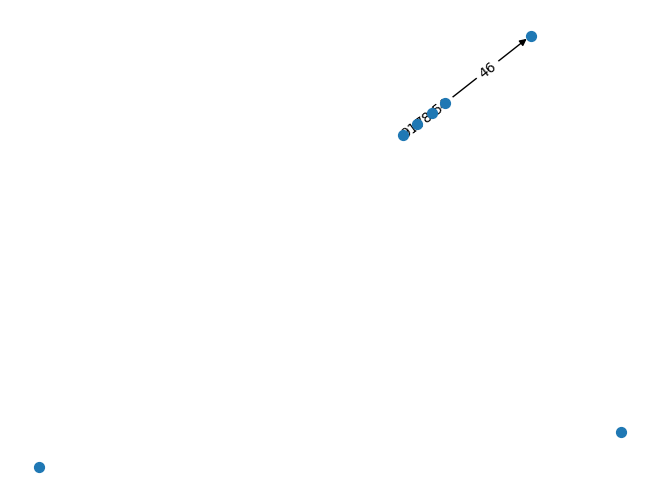

In [13]:
sol, trajectory, transitions = hill_climbing_with_LTN()
create_LTN(trajectory, transitions)

In [14]:
def hill_climbing_multiple_runs(n_runs):
    all_trajectories = []
    all_transitions = []

    for _ in range(n_runs):
        sol, trajectory, transitions = hill_climbing_with_LTN()  # Use the hill climbing with LTN version
        all_trajectories.extend(trajectory)
        all_transitions.extend(transitions)

    return all_trajectories, all_transitions

In [15]:
def create_combined_LTN(trajectories, transitions):
    G = nx.DiGraph()

    # Add nodes (solutions) from all trajectories
    unique_nodes = set()
    for sol in set([node for traj in trajectories for node in traj]):
        print(sol)
        unique_nodes.add(sol)
        G.add_node(sol)

    # Add edges (transitions) from all runs
    for transition in transitions:
        src, dest, weight = transition
        if G.has_edge(src, dest):
            G[src][dest]['weight'] += weight  # Accumulate weights if the edge already exists
        else:
            G.add_edge(src, dest, weight=weight)

    # Plot the combined LTN
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False, node_size=50, font_size=8)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

In [17]:
all_trajectories, all_transitions = hill_climbing_multiple_runs(10)
print(all_trajectories)
print(all_transitions)

[(0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1), (0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1), (0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1), (0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1), (0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1), (0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1), (0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1), (0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1), (0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1), (1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0), (0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0), (0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1), (0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0), (0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0), (0, 0, 

0
1


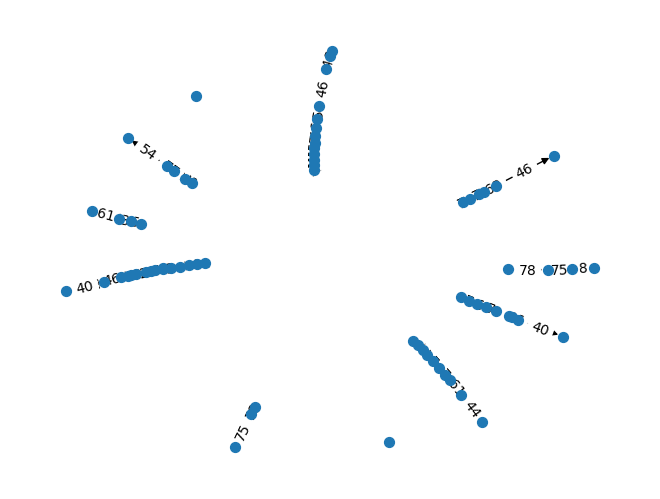

In [18]:
create_combined_LTN(all_trajectories, all_transitions)

In [50]:
def evalIndividual(individual):
    weight = 0
    value = 0
    # print(individual)
    for i in range(n_items):
        value += items[i][0] * individual[i]
        weight += items[i][1] * individual[i]
    if weight > capacity:
        return (0,)
    # print(value)
    return (value,)

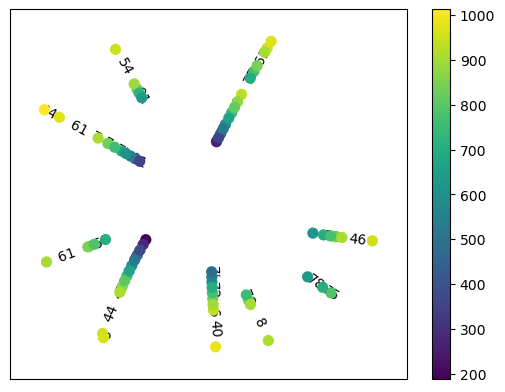

In [21]:
def create_combined_LTN_with_fitness(trajectories, transitions, values, weights, capacity):
    G = nx.DiGraph()

    unique_solutions = set(trajectories)
    
    # Add nodes (solutions) with fitness information
    for sol in unique_solutions:
        # print(sol)
        fitness = knapsack_fitness(sol, values, weights, capacity)
        G.add_node(sol, fitness=fitness)

    # Add edges (transitions) from all runs
    for transition in transitions:
        src, dest, weight = transition
        if G.has_edge(src, dest):
            G[src][dest]['weight'] += weight  # Accumulate weights if the edge already exists
        else:
            G.add_edge(src, dest, weight=weight)

    # Plot the combined LTN
    pos = nx.spring_layout(G)
    
    # Node colors based on fitness
    node_colors = [G.nodes[node]['fitness'] for node in G.nodes()]
    nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.viridis, node_size=50)
    edges = nx.draw_networkx_edges(G, pos)
    
    # Add colorbar
    plt.colorbar(nodes)
    
    # Add labels to the edges
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    plt.show()

create_combined_LTN_with_fitness(all_trajectories, all_transitions, values, weights, capacity)

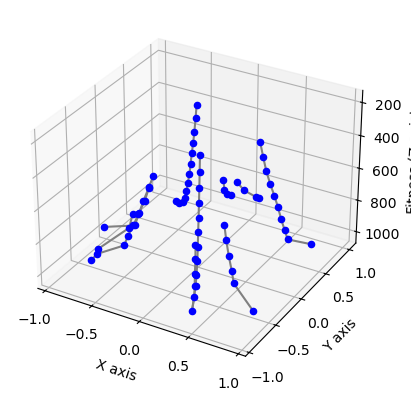

In [24]:
def create_3d_LTN_with_fitness(trajectories, transitions, values, weights, capacity):
    G = nx.DiGraph()

    # Convert the solution tuples to a set of unique solutions
    unique_solutions = set(trajectories)

    # Add nodes (solutions) with fitness information
    for sol in unique_solutions:
        # Convert each tuple to a numpy array for fitness calculation
        fitness = knapsack_fitness(sol, values, weights, capacity)
        G.add_node(sol, fitness=fitness)

    # Add edges (transitions) from all runs
    for transition in transitions:
        src, dest, weight = transition
        if G.has_edge(src, dest):
            G[src][dest]['weight'] += weight  # Accumulate weights if the edge already exists
        else:
            G.add_edge(src, dest, weight=weight)

    # Now that the nodes are added to the graph, calculate 2D positions for them
    pos_2d = nx.spring_layout(G, dim=2)  # Use spring layout for node positions in 2D

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extract node positions and fitness values
    for node, (x, y) in pos_2d.items():
        z = G.nodes[node]['fitness']  # Get the fitness as the z-coordinate
        ax.scatter(x, y, z, c='b', marker='o')  # Plot nodes in 3D

    # Add edges to the plot
    for src, dest in G.edges():
        x_vals = [pos_2d[src][0], pos_2d[dest][0]]
        y_vals = [pos_2d[src][1], pos_2d[dest][1]]
        z_vals = [G.nodes[src]['fitness'], G.nodes[dest]['fitness']]
        ax.plot(x_vals, y_vals, z_vals, 'gray')  # Draw edges

    # Label axes
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Fitness (Z axis)')
    ax.invert_zaxis()

    # Show the plot
    plt.show()

# Call this function with trajectories, transitions, and knapsack parameters
create_3d_LTN_with_fitness(all_trajectories, all_transitions, values, weights, capacity)



In [90]:
hc_result = hill_climbing_with_LTN()
print('')
print(hc_result)

[1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1]
514
[1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1]
604
[1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1]
682
[1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1]
757
[1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1]
832
[1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1]
893
[1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1]
947
[1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1]
987
[1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1]
995
[1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1]
987

(1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1)


In [91]:
lon = nx.Graph()
optima, trajectory, transitions = set(hill_climbing_with_LTN() for _ in range(100))
for opt in optima:
    lon.add_node(opt)

for opt1 in optima:
    for opt2 in optima:
        if sum(1 for i in range(len(opt1)) if opt1[i] != opt2[i]) == 2:
            lon.add_edge(opt1, opt2)

[0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1]
533
[0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1]
611
[0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1]
686
[0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1]
761
[0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1]
836
[0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1]
882
[1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1]
926
[1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1]
966
[1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1]
958
[0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0]
559
[0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0]
636
[0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0]
711
[0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0]
786
[0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1]
849
[0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1]
910
[0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
918
[0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1]
910
[1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
841
[1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
887
[1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1]
879
[1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0]
434
[1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0

In [92]:
def print_lon(lon):
    print("CENTRALITY METRICS")
    print("Degree Centrality:", nx.degree_centrality(lon))
    print("Betweenness Centrality:", nx.betweenness_centrality(lon))
    print("Closeness Centrality:", nx.closeness_centrality(lon))
    print('')

    print("Edges:", len(lon.edges()))
    print("Density of the network:", nx.density(lon))
    print("Average Clustering Coefficient:", nx.average_clustering(lon))

    pos = nx.spring_layout(lon)
    nx.draw(lon, pos, with_labels=False, node_size=50)  # Labels are large, so turned off here
    plt.show()

    components = list(nx.connected_components(lon))
    largest_component = max(components, key=len)

    subgraph = lon.subgraph(largest_component)
    print("Diameter of the network:", nx.diameter(subgraph))
    print("Average path length:", nx.average_shortest_path_length(subgraph))

    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=False, node_size=50)  # Labels are large, so turned off here
    plt.show()



In [93]:
def print_lon3d(lon):
    print("CENTRALITY METRICS")
    print("Degree Centrality:", nx.degree_centrality(lon))
    print("Betweenness Centrality:", nx.betweenness_centrality(lon))
    print("Closeness Centrality:", nx.closeness_centrality(lon))
    print('')

    print("Edges:", len(lon.edges()))
    print("Density of the network:", nx.density(lon))
    print("Average Clustering Coefficient:", nx.average_clustering(lon))

    pos = nx.spring_layout(lon, dim=3)
    x_vals = [pos[node][0] for node in lon.nodes()]
    y_vals = [pos[node][1] for node in lon.nodes()]
    z_vals = [knapsack_fitness(node, values, weights, capacity) for node in lon.nodes()]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.invert_zaxis()
    ax.scatter(x_vals, y_vals, z_vals, s=50)

    for edge in lon.edges():
        x_edge = [pos[edge[0]][0], pos[edge[1]][0]]
        y_edge = [pos[edge[0]][1], pos[edge[1]][1]]
        z_edge = [knapsack_fitness(edge[0], values, weights, capacity), knapsack_fitness(edge[1], values, weights, capacity)]
        ax.plot(x_edge, y_edge, z_edge, color='gray')

    plt.show()

    components = list(nx.connected_components(lon))
    largest_component = max(components, key=len)

    subgraph = lon.subgraph(largest_component)
    print("Diameter of the network:", nx.diameter(subgraph))
    print("Average path length:", nx.average_shortest_path_length(subgraph))

    pos = nx.spring_layout(subgraph, dim=3)
    x_vals = [pos[node][0] for node in subgraph.nodes()]
    y_vals = [pos[node][1] for node in subgraph.nodes()]
    z_vals = [knapsack_fitness(node, values, weights, capacity) for node in subgraph.nodes()]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.invert_zaxis()
    ax.scatter(x_vals, y_vals, z_vals, s=50)

    for edge in subgraph.edges():
        x_edge = [pos[edge[0]][0], pos[edge[1]][0]]
        y_edge = [pos[edge[0]][1], pos[edge[1]][1]]
        z_edge = [knapsack_fitness(edge[0], values, weights, capacity), knapsack_fitness(edge[1], values, weights, capacity)]
        ax.plot(x_edge, y_edge, z_edge, color='gray')

    plt.show()

CENTRALITY METRICS
Degree Centrality: {(1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1): 0.0, (1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0): 0.0, (0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1): 0.08620689655172414, (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1): 0.0, (0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0): 0.017241379310344827, (0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1): 0.20689655172413793, (1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1): 0.13793103448275862, (1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1): 0.017241379310344827, (1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1): 0.06896551724137931, (1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1): 0.10344827586206896, (0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1): 0.15517241379310345, (0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1): 0.10344827586206896, (1, 1, 1, 1

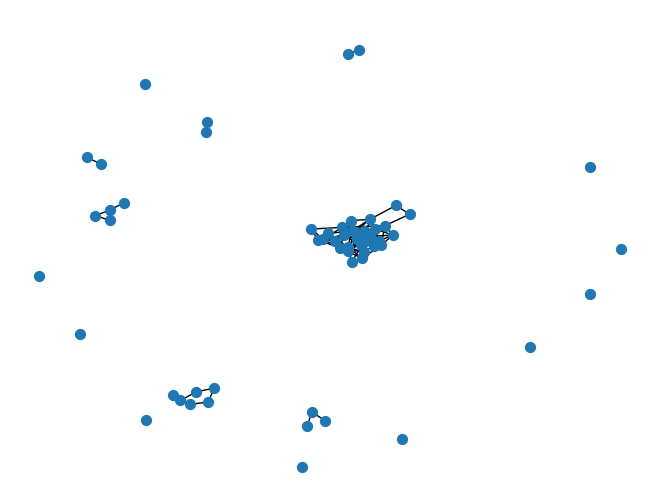

Diameter of the network: 4
Average path length: 2.0781609195402297


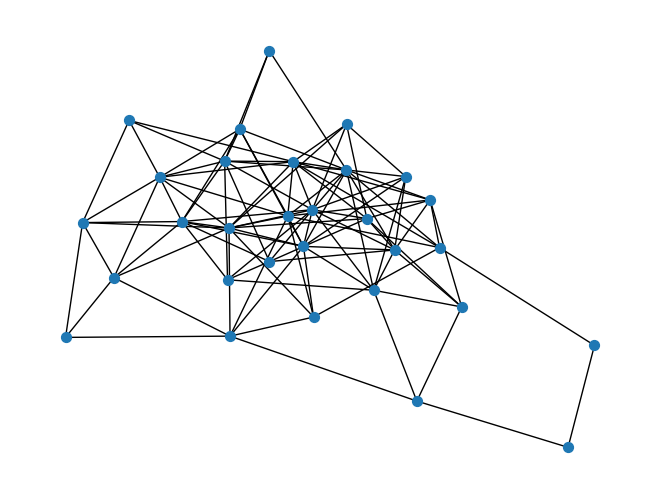

In [94]:
print_lon(lon)

CENTRALITY METRICS
Degree Centrality: {(1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1): 0.0, (1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0): 0.0, (0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1): 0.08620689655172414, (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1): 0.0, (0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0): 0.017241379310344827, (0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1): 0.20689655172413793, (1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1): 0.13793103448275862, (1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1): 0.017241379310344827, (1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1): 0.06896551724137931, (1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1): 0.10344827586206896, (0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1): 0.15517241379310345, (0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1): 0.10344827586206896, (1, 1, 1, 1

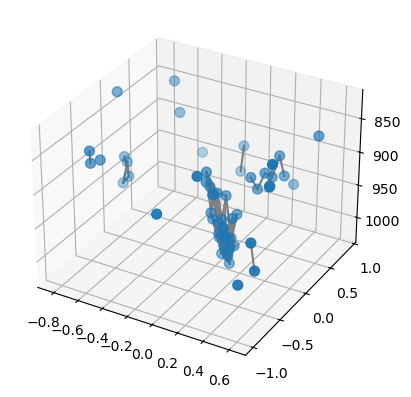

Diameter of the network: 4
Average path length: 2.0781609195402297


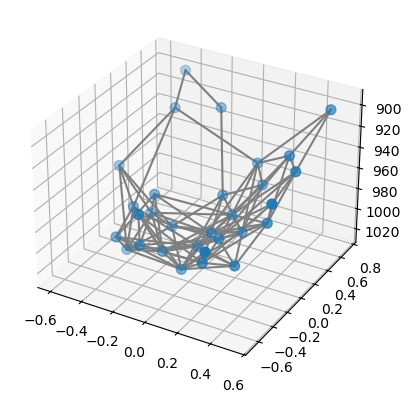

In [95]:
print_lon3d(lon)

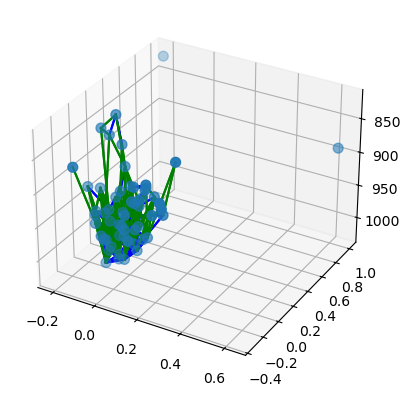

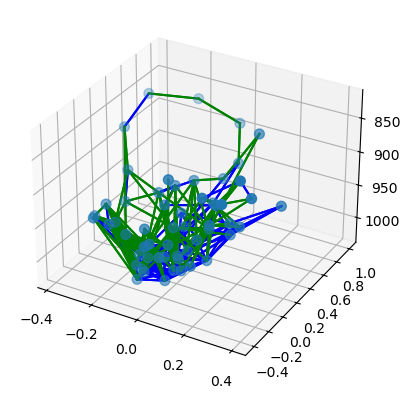

In [96]:
def calc_distance(opt1, opt2):
    return sum(1 for i in range(len(opt1)) if opt1[i] != opt2[i])

lon = nx.Graph()
# optima = set(hill_climbing() for _ in range(10000))

for opt in optima:
    lon.add_node(opt)

edges_1bit = []
edges_2bit = []
edges_3bit = []

for opt1 in optima:
    for opt2 in optima:
        dist = calc_distance(opt1, opt2)
        if dist == 1:
            edges_1bit.append((opt1, opt2))
        elif dist == 2:
            edges_2bit.append((opt1, opt2))
        elif dist == 3:
            edges_3bit.append((opt1, opt2))

lon.add_edges_from(edges_1bit)
lon.add_edges_from(edges_2bit)
lon.add_edges_from(edges_3bit)

pos = nx.spring_layout(lon, dim=3)

x_vals = [pos[node][0] for node in lon.nodes()]
y_vals = [pos[node][1] for node in lon.nodes()]
z_vals = [knapsack_fitness(node, values, weights, capacity) for node in lon.nodes()]

# Plotting in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Drawing nodes
ax.scatter(x_vals, y_vals, z_vals, s=50)

# Drawing edges for 1-bit difference in one color
for edge in edges_1bit:
    x_edge = [pos[edge[0]][0], pos[edge[1]][0]]
    y_edge = [pos[edge[0]][1], pos[edge[1]][1]]
    z_edge = [knapsack_fitness(edge[0], values, weights, capacity), knapsack_fitness(edge[1], values, weights, capacity)]
    ax.plot(x_edge, y_edge, z_edge, color='red')  # 1-bit difference: red

# Drawing edges for 2-bit difference in another color
for edge in edges_2bit:
    x_edge = [pos[edge[0]][0], pos[edge[1]][0]]
    y_edge = [pos[edge[0]][1], pos[edge[1]][1]]
    z_edge = [knapsack_fitness(edge[0], values, weights, capacity), knapsack_fitness(edge[1], values, weights, capacity)]
    ax.plot(x_edge, y_edge, z_edge, color='blue')  # 2-bit difference: blue

# Drawing edges for 3-bit difference in another color
for edge in edges_3bit:
    x_edge = [pos[edge[0]][0], pos[edge[1]][0]]
    y_edge = [pos[edge[0]][1], pos[edge[1]][1]]
    z_edge = [knapsack_fitness(edge[0], values, weights, capacity), knapsack_fitness(edge[1], values, weights, capacity)]
    ax.plot(x_edge, y_edge, z_edge, color='green')  # 3-bit difference: green

ax.invert_zaxis()

plt.show()

components = list(nx.connected_components(lon))
largest_component = max(components, key=len)
subgraph = lon.subgraph(largest_component)

pos = nx.spring_layout(subgraph, dim=3)

x_vals = [pos[node][0] for node in subgraph.nodes()]
y_vals = [pos[node][1] for node in subgraph.nodes()]
z_vals = [knapsack_fitness(node, values, weights, capacity) for node in subgraph.nodes()]

# Plotting in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Drawing nodes
ax.scatter(x_vals, y_vals, z_vals, s=50)

# Drawing edges for 1-bit difference in one color
for edge in edges_1bit:
    x_edge = [pos[edge[0]][0], pos[edge[1]][0]]
    y_edge = [pos[edge[0]][1], pos[edge[1]][1]]
    z_edge = [knapsack_fitness(edge[0], values, weights, capacity), knapsack_fitness(edge[1], values, weights, capacity)]
    ax.plot(x_edge, y_edge, z_edge, color='red')  # 1-bit difference: red

# Drawing edges for 2-bit difference in another color
for edge in edges_2bit:
    x_edge = [pos[edge[0]][0], pos[edge[1]][0]]
    y_edge = [pos[edge[0]][1], pos[edge[1]][1]]
    z_edge = [knapsack_fitness(edge[0], values, weights, capacity), knapsack_fitness(edge[1], values, weights, capacity)]
    ax.plot(x_edge, y_edge, z_edge, color='blue')  # 2-bit difference: blue

# Drawing edges for 3-bit difference in another color
for edge in edges_3bit:
    x_edge = [pos[edge[0]][0], pos[edge[1]][0]]
    y_edge = [pos[edge[0]][1], pos[edge[1]][1]]
    z_edge = [knapsack_fitness(edge[0], values, weights, capacity), knapsack_fitness(edge[1], values, weights, capacity)]
    ax.plot(x_edge, y_edge, z_edge, color='green')  # 3-bit difference: green

ax.invert_zaxis()

plt.show()

In [ ]:
def evalIndividual(individual):
    weight = 0
    value = 0
    # print(individual)
    for i in range(n_items):
        value += items[i][0] * individual[i]
        weight += items[i][1] * individual[i]
    if weight > capacity:
        return (0,)
    # print(value)
    return (value,)

def BasicEA(pop_size, n_generations):
    # Create fitness class
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    # weights is positive to signify maximisation of fitness, use negative to minimise
    # weights must be a tuple to allow to single and multi objective problems
    # to be treated in the same way

    # create individual class
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox() # Initialise DEAP toolbox
    toolbox.register("attr_int", random.randint, 0, 1) # generate atributes of 0 or 1
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=n_items)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    # toolbox.register("select", tools.selBest)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", evalIndividual)

    gen = 0
    # initialise population
    population = toolbox.population(pop_size)
    # print(population)

    ngen, cxpb, mutpb = n_generations, 0.5, 0.2  # Number of generations, crossover probability, mutation probability

    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", lambda x: sum(f[0] for f in x) / len(x))
    stats.register("max", lambda x: max(f[0] for f in x))

    algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, stats=stats, halloffame=hof, verbose=True)

    best_ind = hof[0]
    print(f"Best individual: {best_ind}, Value: {evalIndividual(best_ind)[0]}")